#**Snigdha Chigurupati**

#**DATA 606-Capstone Project**

##Introduction

### Project Overview
    
This project aims to develop a recommender system using the IMDb movie dataset from Kaggle. The recommender system will provide personalized movie recommendations to users, helping them discover relevant movies based on their preferences and the rich information available in the dataset.

### Data Source

This dataset from kaggle created by Ashish Jangra, is having the data of size, 661 MB.

Total observations: 2590932

Features:

1. id - Movie ID
2. name - Name of the Movie
3. year - Year of movie release
4. rating - Rating of the Movie
5. certificate - Movie Certification
6. duration - Duration of the Movie
7. genre - Genre of the Movie
8. votes - Number of people who voted for the IMDB rating
9. gross_income - Gross Income of the Movie
10. directors_id - ID of Directors who have worked on the movie
11. directors_name - Name of the movie director
12. stars_id - Star ID
13. stars_name - Name of the stars in the movie
14. description - Movie description

Unit of Analysis: Movies(IMDB ratings, votes, genre, stars, director, description)

Dataset link: https://www.kaggle.com/datasets/ashishjangra27/imdb-movies-dataset

### Research Interests and outcomes

To understand the choice of the users and develop an accurate and effective recommendation system that suggests relevant movies to users based on their preferences and historical movie ratings. The system aims to enhance the movie-watching experience by reducing information overload and assisting users in discovering movies they are likely to enjoy.

### Preliminary Analysis

#### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
df = pd.read_csv("/content/sample_data/movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590932 entries, 0 to 2590931
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   name            object 
 2   year            object 
 3   rating          float64
 4   certificate     object 
 5   duration        object 
 6   genre           object 
 7   votes           object 
 8   gross_income    object 
 9   directors_id    object 
 10  directors_name  object 
 11  stars_id        object 
 12  stars_name      object 
 13  description     object 
dtypes: float64(1), object(13)
memory usage: 276.7+ MB


In [ ]:
null_values = df.isnull().sum()
null_values

id                0
name              0
year              0
rating            0
certificate       0
duration          0
genre             0
votes             0
gross_income      0
directors_id      0
directors_name    0
stars_id          0
stars_name        0
description       0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.count()

id                2590932
name              2590932
year              2590932
rating            2590932
certificate       2590932
duration          2590932
genre             2590932
votes             2590932
gross_income      2590932
directors_id      2590932
directors_name    2590932
stars_id          2590932
stars_name        2590932
description       2590932
dtype: int64

In [ ]:
# Strip whitespace and convert to lowercase for comparison
cat_vars = [col for col in df.columns if df[col].dtype == 'object']
df[cat_vars] = df[cat_vars].applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [ ]:
df = df.drop(df[
    (df['rating'] == 11) &
    (df['certificate'] == 'not certified') &
    (df['duration'] == '0 min') &
    (df['votes'] == '0') &
    (df['gross_income'] == '0') &
    (df['directors_name'] == 'nm0000000') &
    (df['stars_name'] == 'nm0000000') &
    (df['description'] == 'add a plot')
].index).reset_index(drop=True)

df.drop_duplicates(inplace=True)
df


,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,best in sex: 2015 avn awards,(2015 tv special),4.0,tv-ma,94 min,"adult, news",124.0,0,nm1624094,gary miller,"nm4766272,nm2670531,nm4920605,nm6284246","farrah laurel abraham,asa akira,anikka albrite...",the hottest adult stars and top adult movies a...
1,tt1281857,naughty novelist,(2008 video),3.8,not certified,88 min,adult,174.0,0,nm0045256,john bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","darian caine,jackie stevens,a.j. khan,arrora",darian is a successful journalist but when she...
2,tt2294954,2011 avn awards show,(2011 tv special),5.7,not certified,83 min,"adult, news",39.0,0,"nm1624094,nm0754845","gary miller,timothy e. sabo","nm2200343,nm2670531,nm1267549,nm3585599","aubrey addams,asa akira,monique alexander,rave...",add a plot
3,tt6843596,best in sex: 2017 avn awards,(2017 tv special),4.9,tv-ma,87 min,"adult, news",225.0,0,nm1624094,gary miller,"nm5221471,nm2670531,nm4920605,nm3038816","amirah adara,asa akira,anikka albrite,britney ...","considered the industry's highest honor, the a..."
4,tt3705604,avn awards 2014,(2014 tv special),6.7,r,82 min,"adult, news",101.0,0,nm1624094,gary miller,"nm2670531,nm4920605,nm6284246,nm3992720","asa akira,anikka albrite,august ames,jessie an...",erotic filmmaking superstars chanel preston an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438797,tt9898738,alla mot alla med filip och fredrik,(2019– ),11.0,not certified,0 min,game-show,0,0,anonymous,nm0000000,"nm1229568,nm1229296,nm10518401,nm0423935","filip hammar,fredrik wikingsson,emma frans,eri...",add a plot
2438798,tt9898742,alla mot alla med filip och fredrik,(2019– ),11.0,not certified,0 min,game-show,0,0,anonymous,nm0000000,"nm1229568,nm1229296,nm0423935,nm2644274","filip hammar,fredrik wikingsson,erik johansson...",add a plot
2438799,tt9898746,alla mot alla med filip och fredrik,(2019– ),11.0,not certified,0 min,game-show,0,0,anonymous,nm0000000,"nm1229568,nm1229296,nm3355023,nm7732727","filip hammar,fredrik wikingsson,hanna hellquis...",add a plot
2438800,tt9898802,aslan max eglence fabrikasi,(2016–2017),11.0,not certified,0 min,game-show,0,0,anonymous,nm0000000,anonymous,nm0000000,add a plot


**1. Distribution of Ratings**

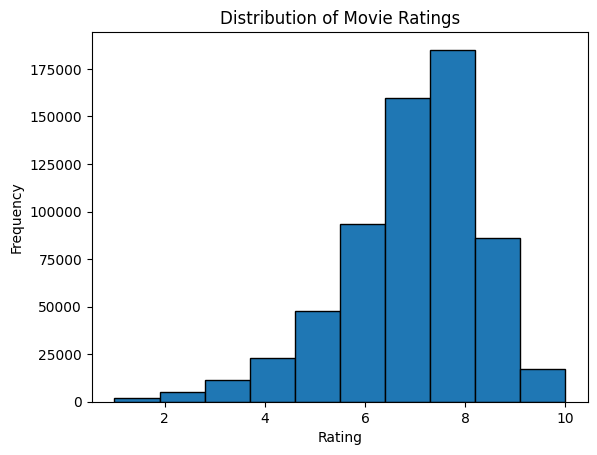

In [ ]:
df_dor = df[(df['rating'] >= 1) & (df['rating'] <= 10)]

plt.hist(df_dor['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**2. Popularity of Genres**

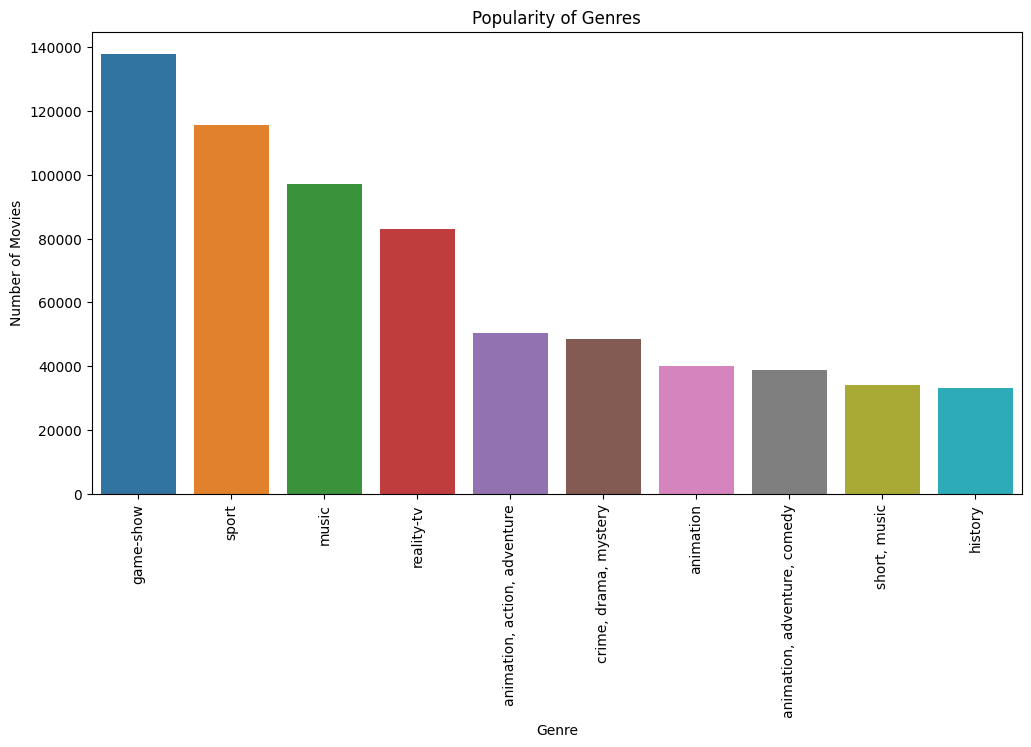

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().head(10).index)
plt.title('Popularity of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Drop rows where the description matches 'add a plot'
df.drop(df[df['description'] == 'add a plot'].index, inplace=True)
df

,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,best in sex: 2015 avn awards,(2015 tv special),4.0,tv-ma,94 min,"adult, news",124.0,0,nm1624094,gary miller,"nm4766272,nm2670531,nm4920605,nm6284246","farrah laurel abraham,asa akira,anikka albrite...",the hottest adult stars and top adult movies a...
1,tt1281857,naughty novelist,(2008 video),3.8,not certified,88 min,adult,174.0,0,nm0045256,john bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","darian caine,jackie stevens,a.j. khan,arrora",darian is a successful journalist but when she...
3,tt6843596,best in sex: 2017 avn awards,(2017 tv special),4.9,tv-ma,87 min,"adult, news",225.0,0,nm1624094,gary miller,"nm5221471,nm2670531,nm4920605,nm3038816","amirah adara,asa akira,anikka albrite,britney ...","considered the industry's highest honor, the a..."
4,tt3705604,avn awards 2014,(2014 tv special),6.7,r,82 min,"adult, news",101.0,0,nm1624094,gary miller,"nm2670531,nm4920605,nm6284246,nm3992720","asa akira,anikka albrite,august ames,jessie an...",erotic filmmaking superstars chanel preston an...
5,tt12741008,couples guest house,(2020– ),6.0,not certified,0 min,"adult, romance",54.0,0,anonymous,nm0000000,"nm11750590,nm11750463,nm11750588,nm11750589","jayesh arora,rakhi sharma,ekta killar,vinod go...",2 romantic couples moves out for a trip and st...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438782,tt9894550,impossible celebrities,(2018– ),11.0,not certified,48 min,game-show,0,0,nm0726386,richard van't riet,"nm2051874,nm4587088,nm8877713,nm2928438","rick edwards,jordan banjo,eyal booker,susan ca...",comedian lucy porter is the latest celebrity g...
2438790,tt9896728,the price is right,(1972– ),11.0,tv-g,38 min,"family, game-show, reality-tv",0,0,anonymous,nm0000000,"nm0004804,nm3012883,nm10550074,nm10550072","drew carey,manuela arbeláez,spencer chabot,bri...","games include '1/2 off', 'squeeze play' and 's..."
2438791,tt9896732,the price is right,(1972– ),11.0,tv-g,38 min,"family, game-show, reality-tv",0,0,anonymous,nm0000000,"nm0004804,nm3012883,nm10206521","drew carey,manuela arbeláez,devin goda",we're winning this winsday-wednesday! join the...
2438794,tt9898046,university challenge,(1962– ),11.0,not certified,0 min,game-show,0,0,nm7574443,tracey rooney,"nm0668096,nm1187097","jeremy paxman,roger tilling",the university of bristol faces st edmund hall...


**Word Cloud of Movie Descriptions**

In [ ]:
stop_words = set(stopwords.words("english"))

# Filter and extract descriptions from the DataFrame
filtered_descriptions = df[df['description'] != 'add a plot']['description']

# Join the descriptions into a single string
text = ' '.join(filtered_descriptions)

# Tokenize the summary
word_tokens = text.split()

# Remove non-alphanumeric characters and filter out stopwords
filtered_words = [re.sub(r'\W+', '', word) for word in word_tokens if word.lower() not in stop_words and re.sub(r'\W+', '', word) != '']

# Count the frequency of each word
word_frequencies = Counter(filtered_words)

# Get the top 100 most common words
top_500_words = [word for word, freq in word_frequencies.most_common(500)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


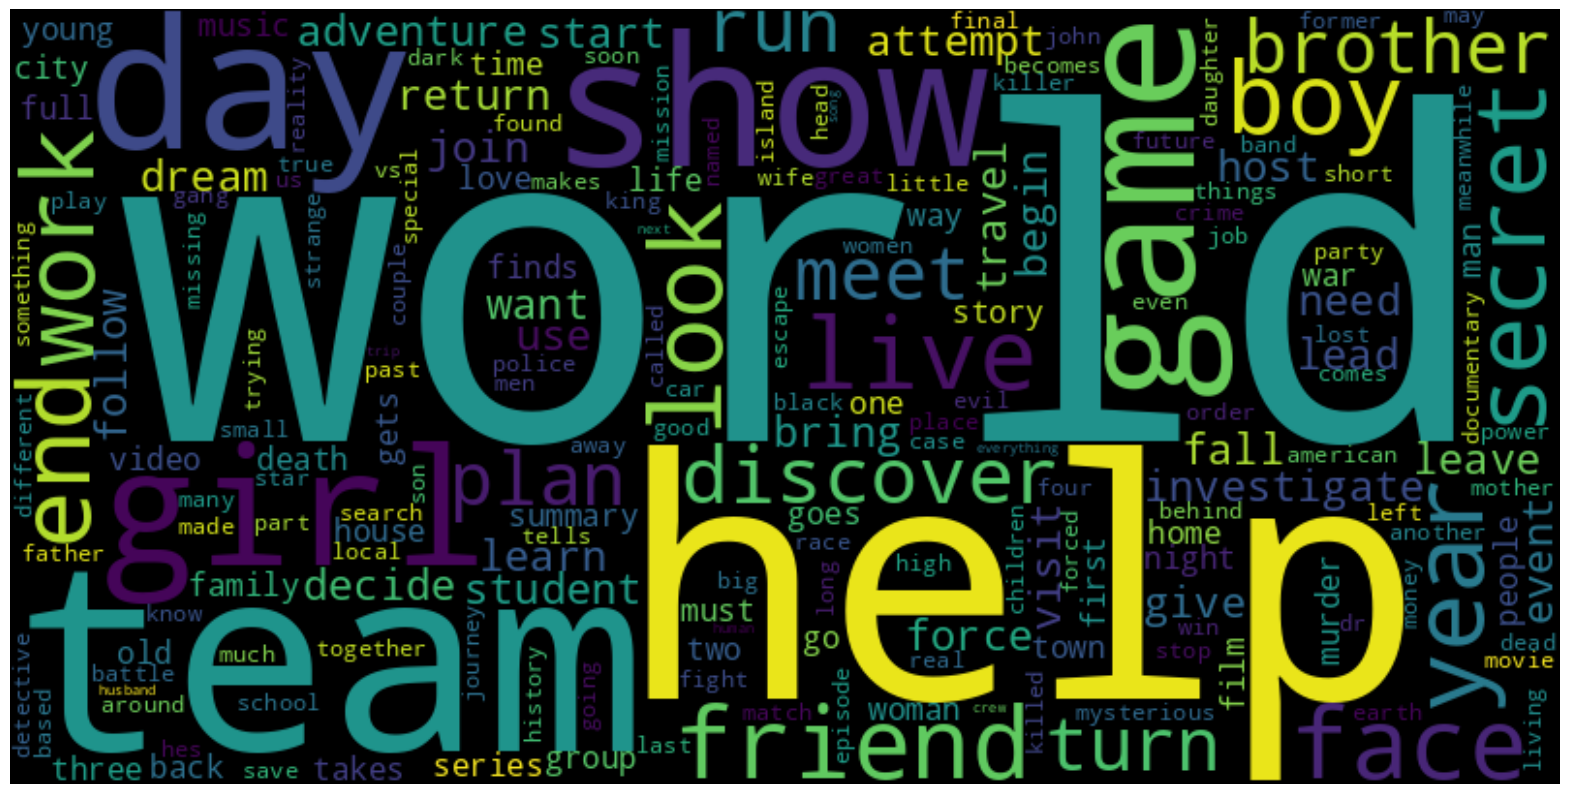

In [ ]:
additional_stopwords = ['make', 'find','become','see','tries','set','try','best','come','take','new']
top_500_words = [word for word in top_500_words if word not in additional_stopwords]
wordcloud = WordCloud(width=800, height=400).generate(' '.join(top_500_words))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.sample(100).reset_index(drop=True).to_csv("output_100.csv")